In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
df = pd.read_csv('./input/bank-additional-full.csv', sep=';')

## Data undertanding

* Виведіть загальну інформацію про набір даних. Яку кількість змінних він містить? Який тип змінних? Чи багато пропущених значень?

In [203]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Цей датасет містить 21 стовпець та 41188 рядки. Кожен рядок - клієнт, кожен стовпець - інформація про клієнта.
Типи змінних:

**age** - вік - int64<br>
**job** - професія - object<br>
**marital** - сімейний стан - object<br>
**education** - освіта - object<br>
**default** - чи має кредит за замовчуванням? - object<br>
**housing** - чи має кредит на житло? - object<br>
**loan** - чи має особисту позику? - object<br>
**contact** - контактний тип зв'язку - object<br>
**month** - місяць останнього контакту в році - object<br>
**day_of_week** - день тижня останнього контакту - object<br>
**duration** - тривалість останнього контакту в секундах - int64<br>
**campaign** - кількість контактів, здійснених протягом цієї кампанії та для цього клієнта - int64<br>
**pdays** - кількість днів, що минули після останнього контакту з клієнтом із попередньої кампанії - int64<br>
**previous** - кількість контактів, здійснених до цієї кампанії та для цього клієнта - int64<br>
**poutcome** - результат попередньої маркетингової кампанії - object<br>
**emp.var.rate** - коефіцієнт зміни зайнятості, квартальний показник - float64<br>
**cons.price.idx** - індекс споживчих цін, місячний показник - float64<br>
**cons.conf.idx** - індекс споживчої довіри, місячний показник - float64<br>
**euribor3m** - ставка euribor за 3 місяці, щоденний показник - float64<br>
**nr.employed** - кількість працівників, квартальний показник - float64<br>
**y** - чи підписав клієнт терміновий депозит? - object<br>

Перевіримо кількість пропущених значень.

In [205]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Отже, пропущених значень немає.

* Виведіть описову статистику по числовим змінним. Зробіть візуалізацію розподілів найцікавіших із них. Що можна сказати про наявність помилкових значень? Чи багато нетипових значень?

In [206]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


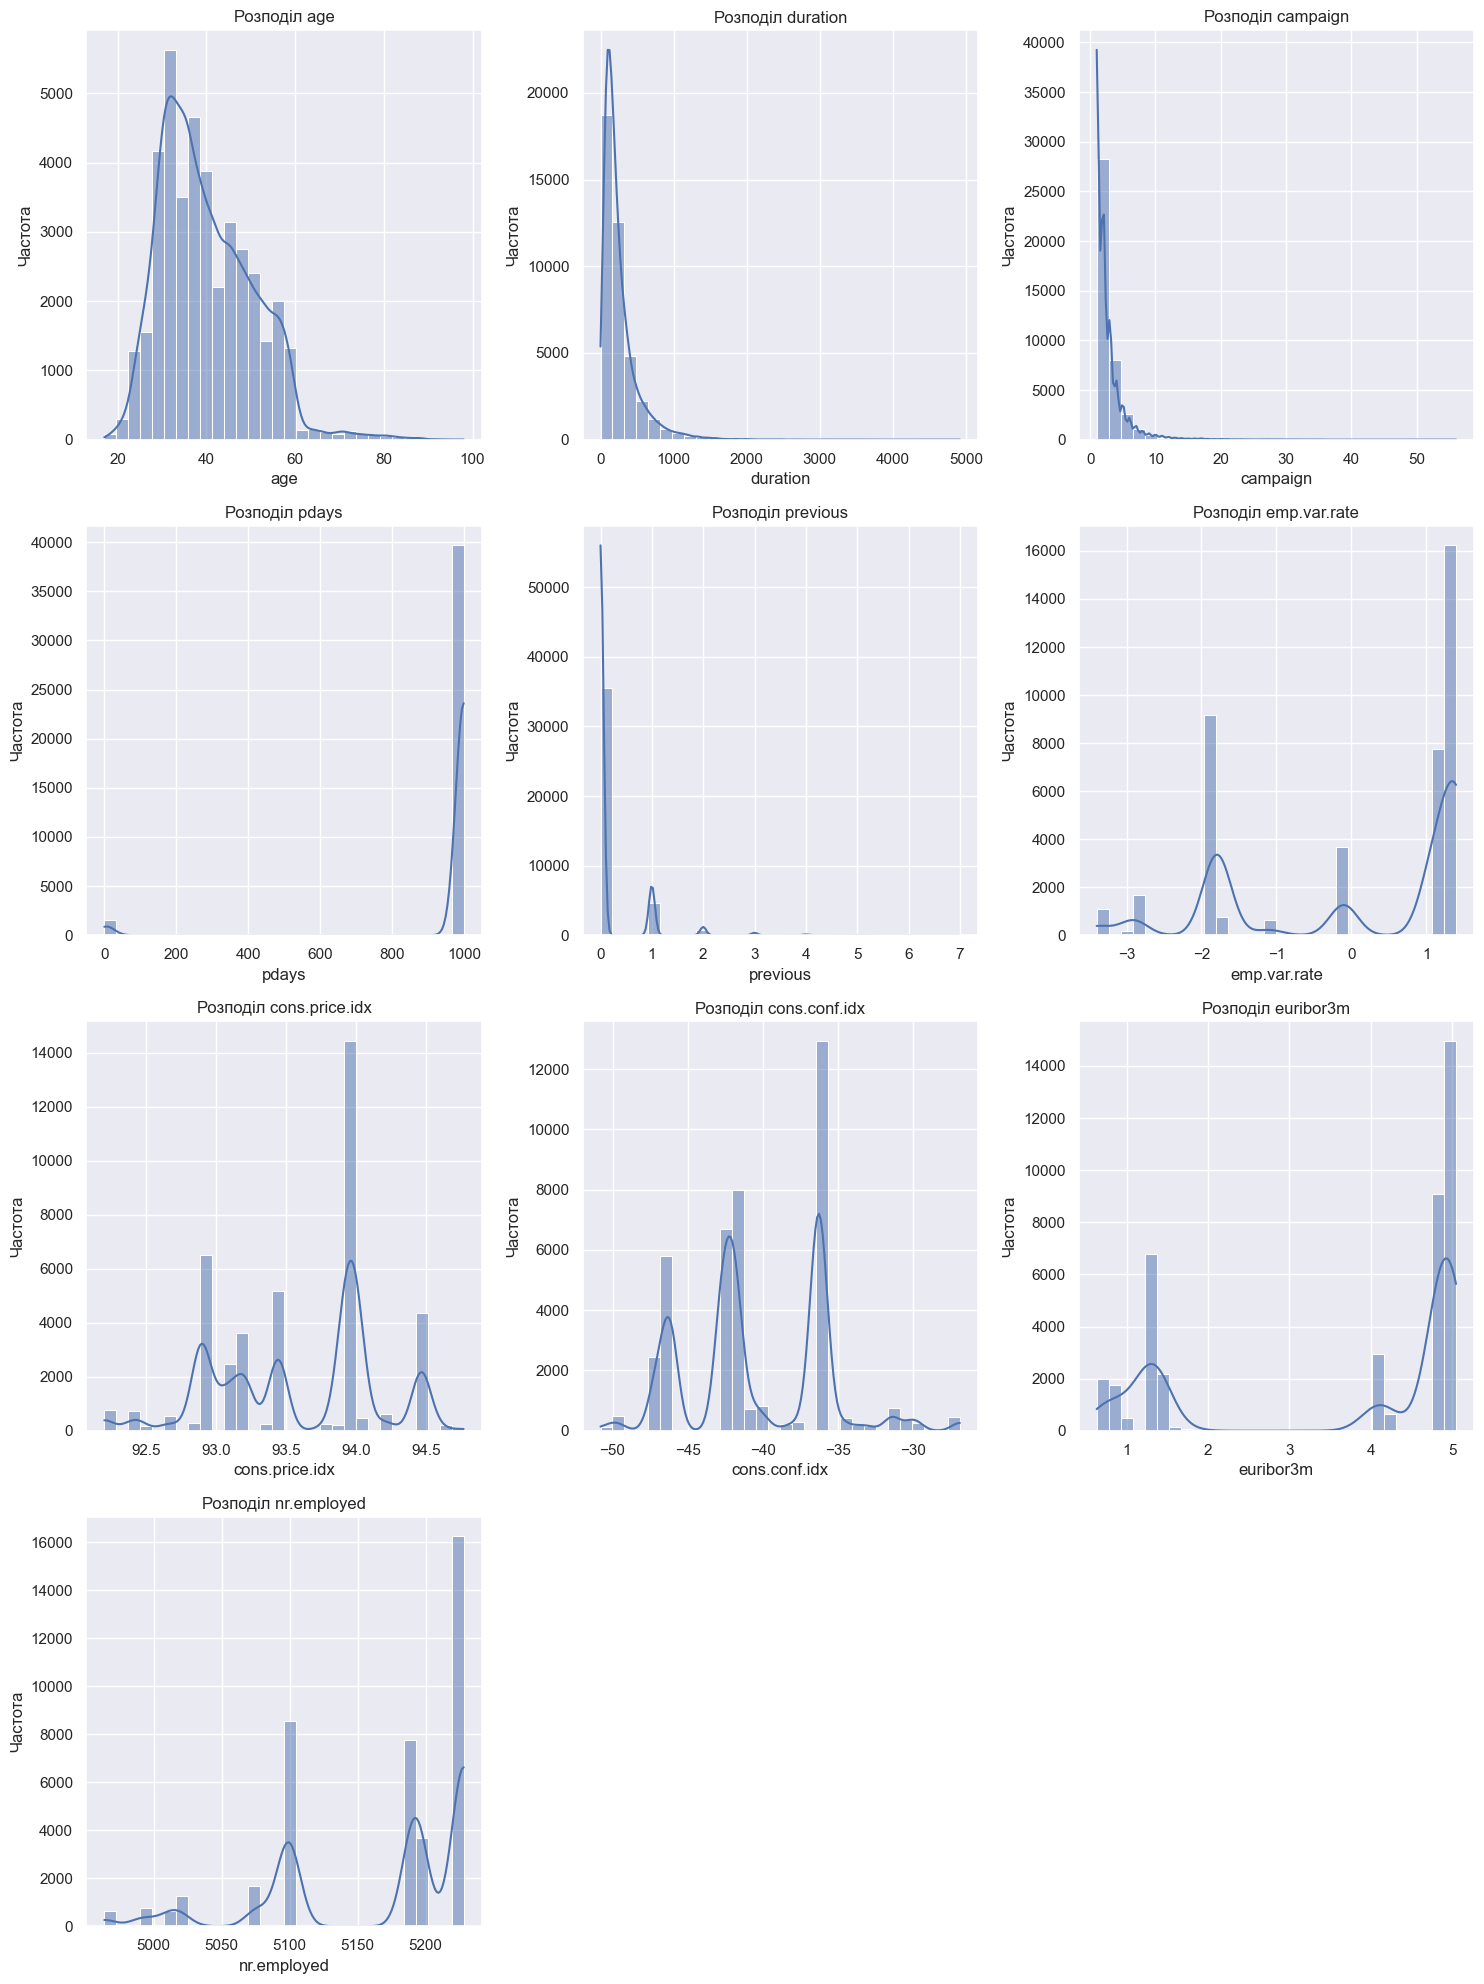

In [207]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

num_plots = len(numeric_columns)
num_cols = 3 
num_rows = (num_plots + num_cols - 1) // num_cols 

plt.figure(figsize=(15, num_rows * 5))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Розподіл {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

<Axes: >

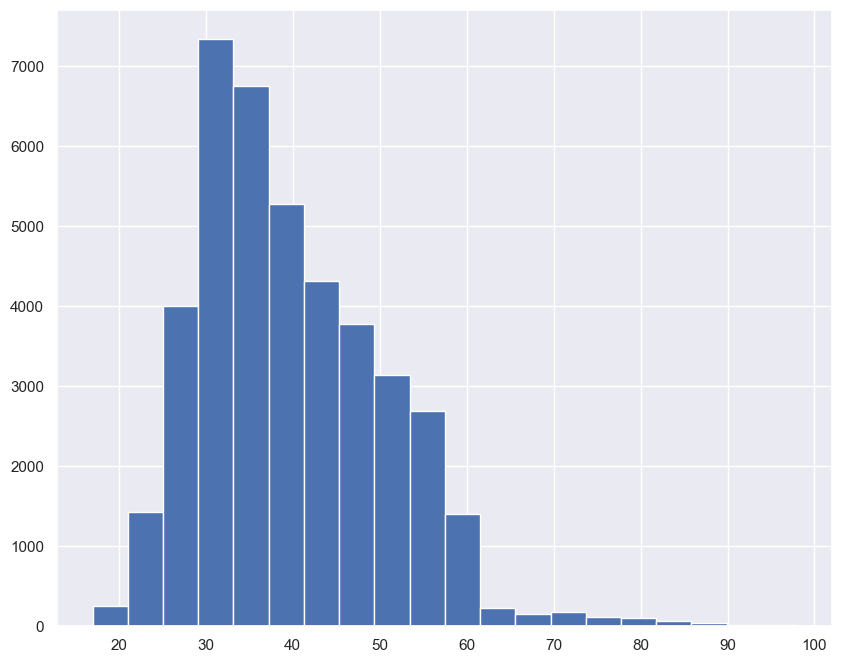

In [208]:
df['age'].hist(bins=20)

<Axes: >

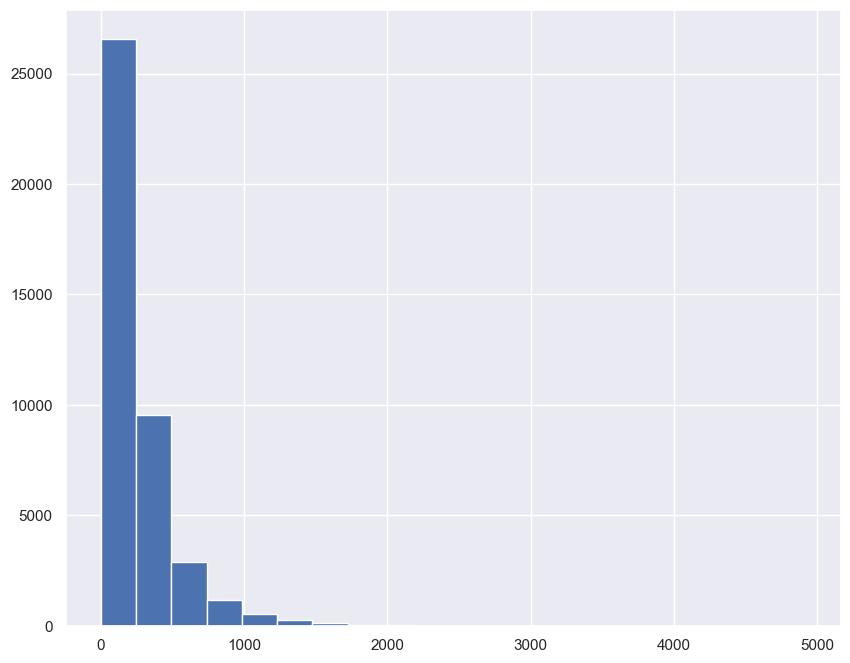

In [209]:
df['duration'].hist(bins=20)

<Axes: >

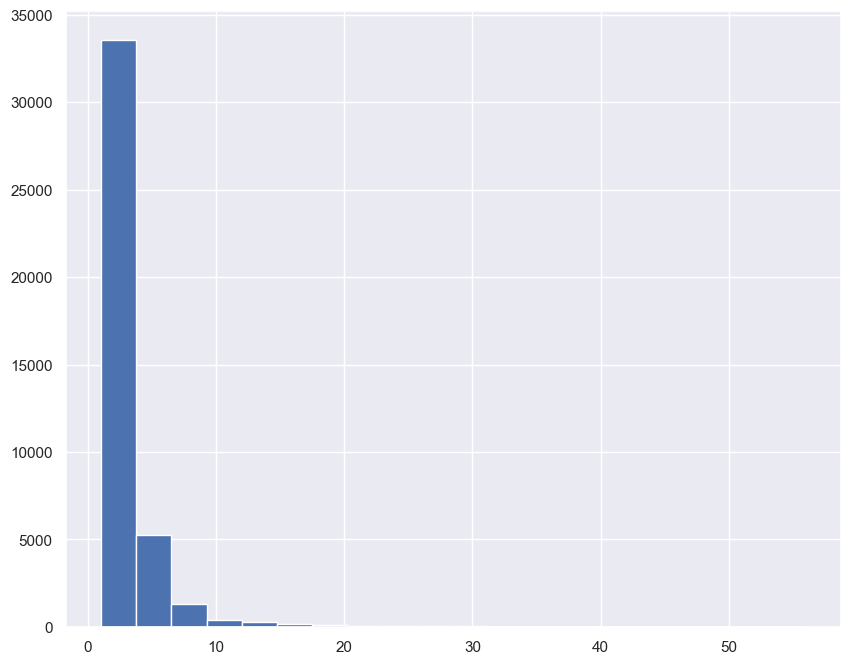

In [210]:
df['campaign'].hist(bins=20)

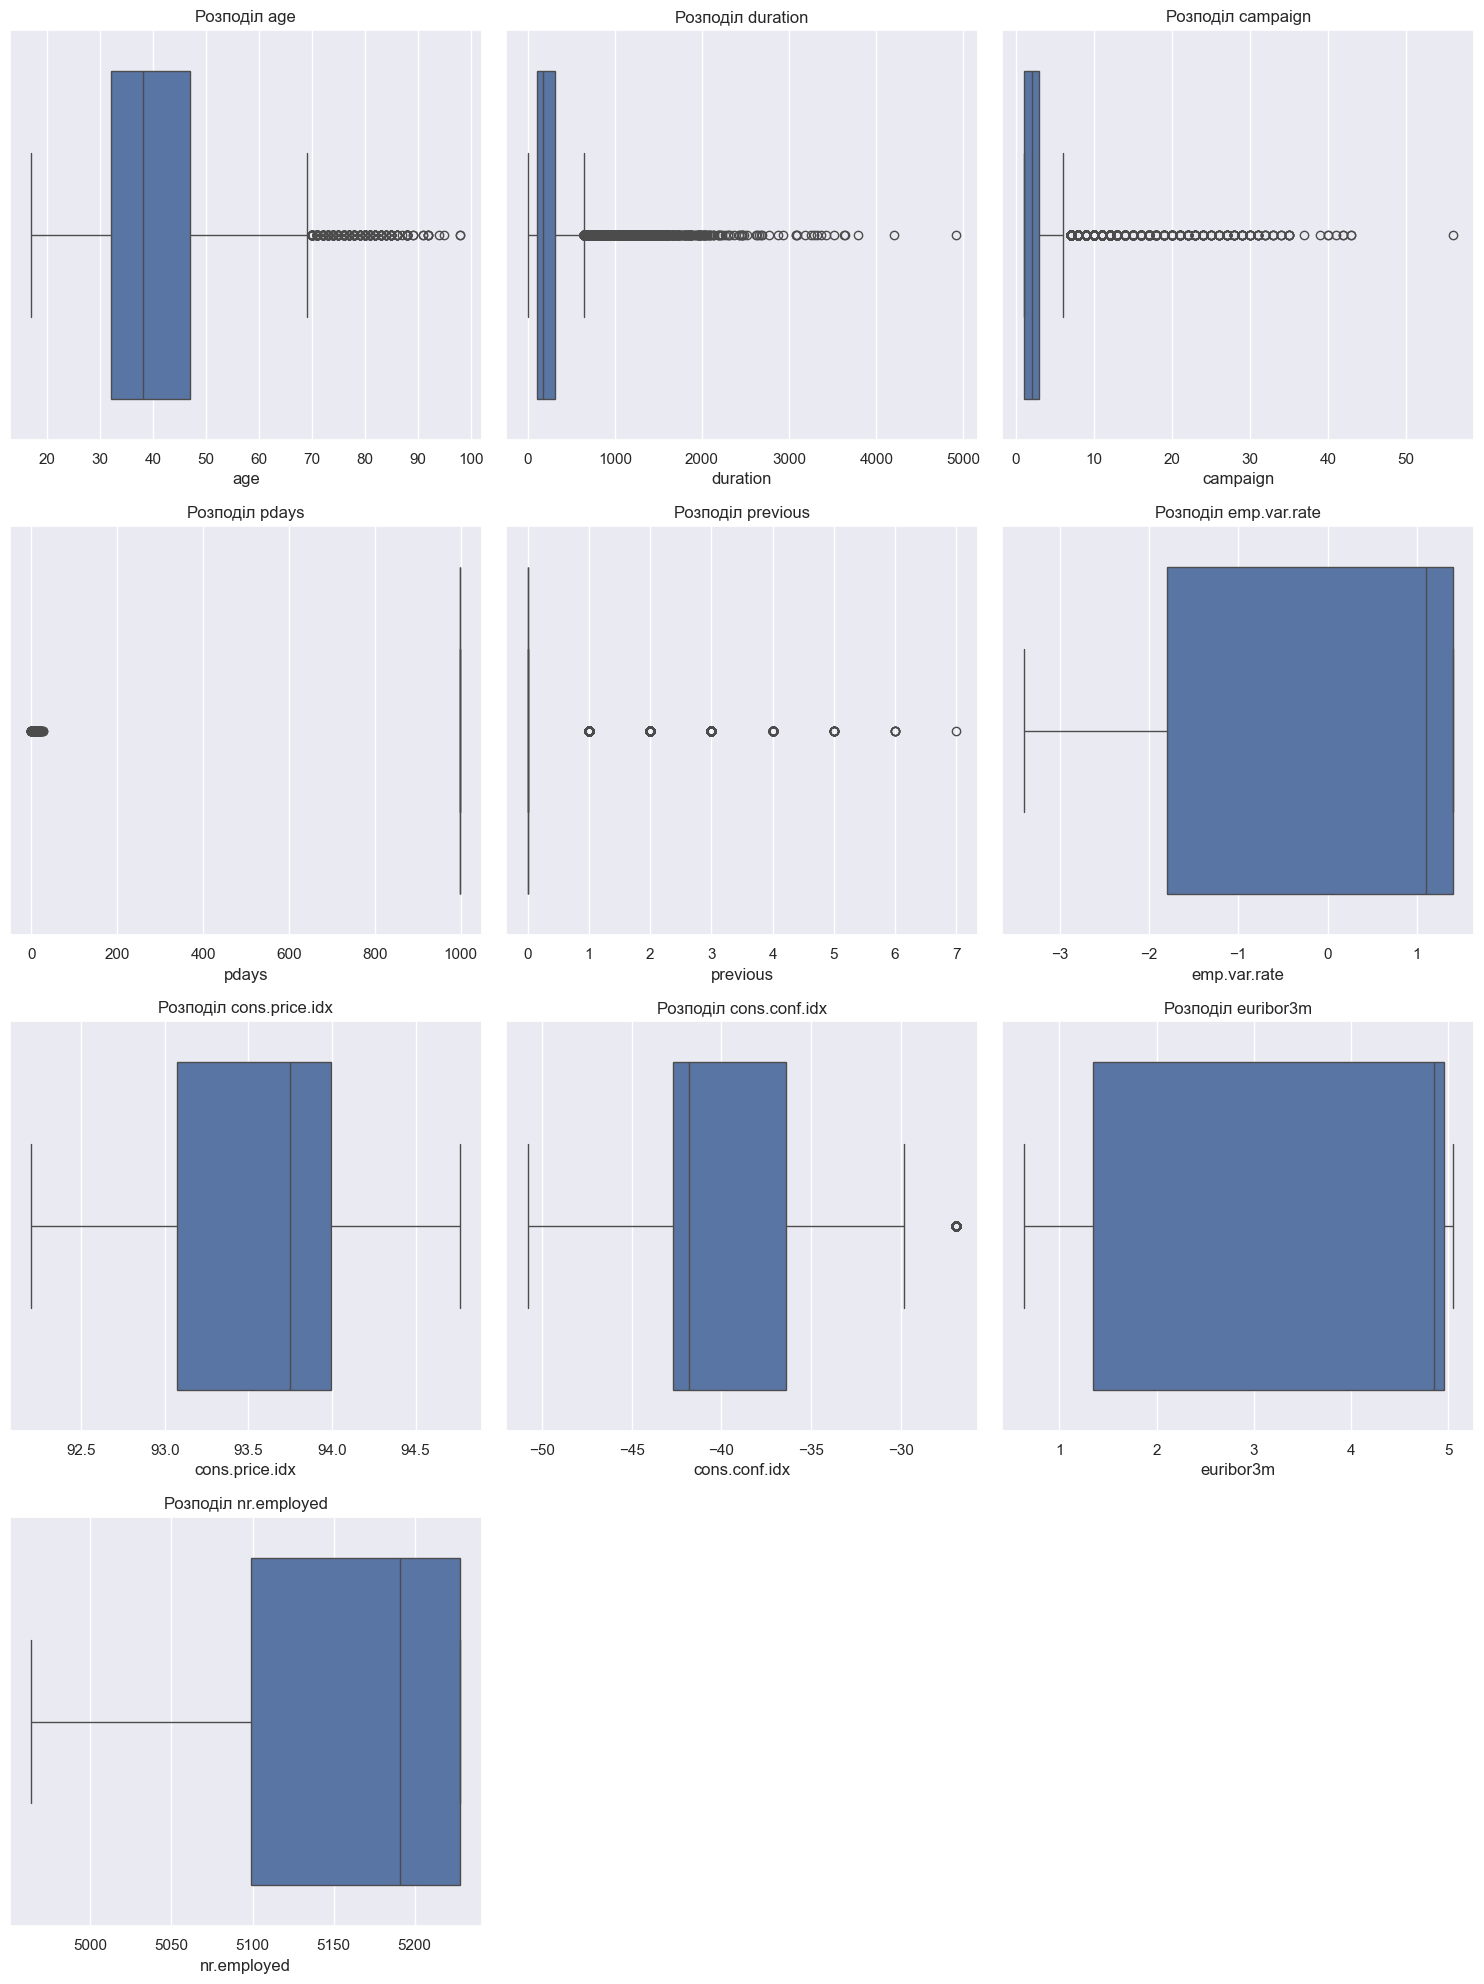

In [211]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

num_plots = len(numeric_columns)
num_cols = 3
num_rows = (num_plots + num_cols - 1) // num_cols

plt.figure(figsize=(15, num_rows * 5))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[column])
    plt.title(f'Розподіл {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

Зробимо оцінку кількості викидів.

In [226]:
outlier_percentages = {}
outlier_counts = {}
outliers_combined_df = pd.DataFrame()

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    num_outliers = len(outliers)
    outlier_counts[column] = num_outliers

    total_entries = len(df)
    outlier_percentage = (num_outliers / total_entries) * 100
    outlier_percentages[column] = outlier_percentage
    
    outliers_combined_df = pd.concat([outliers_combined_df, outliers])

for col, perc in outlier_percentages.items():
    print(f'{col}: {perc:.2f}%')

age: 1.14%
duration: 7.19%
campaign: 5.84%
pdays: 3.68%
previous: 13.66%
emp.var.rate: 0.00%
cons.price.idx: 0.00%
cons.conf.idx: 1.09%
euribor3m: 0.00%
nr.employed: 0.00%


Високий відсоток викидів у стовпці previous: Цей стовпець має найвищий відсоток викидів (13.66%). Це може свідчити про те, що значення в цьому стовпці мають значну варіативність або є кілька аномальних значень, які суттєво відрізняються від інших.

Помірний відсоток викидів у стовпцях duration, campaign та pdays: Ці стовпці також мають помітний відсоток викидів (7.19%, 5.84% та 3.68% відповідно). Це може вказувати на те, що деякі значення в цих стовпцях виходять за межі нормального діапазону, що може вплинути на аналіз даних.

Мінімальний або відсутній відсоток викидів у інших стовпцях: Стовпці emp.var.rate, cons.price.idx, euribor3m та nr.employed не мають викидів, що свідчить про стабільність та однорідність даних у цих стовпцях.

В цілому, відсоток викидів у більшості стовпців є досить низьким, що може свідчити про якість даних.

* Виведіть описову статистику по категоріальним змінним. Зробіть візуалізацію розподілів найцікавіших із них.

In [212]:
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f'Описова статистика для {column}:')
    print(df[column].describe())
    print()

Описова статистика для job:
count      41188
unique        12
top       admin.
freq       10422
Name: job, dtype: object

Описова статистика для marital:
count       41188
unique          4
top       married
freq        24928
Name: marital, dtype: object

Описова статистика для education:
count                 41188
unique                    8
top       university.degree
freq                  12168
Name: education, dtype: object

Описова статистика для default:
count     41188
unique        3
top          no
freq      32588
Name: default, dtype: object

Описова статистика для housing:
count     41188
unique        3
top         yes
freq      21576
Name: housing, dtype: object

Описова статистика для loan:
count     41188
unique        3
top          no
freq      33950
Name: loan, dtype: object

Описова статистика для contact:
count        41188
unique           2
top       cellular
freq         26144
Name: contact, dtype: object

Описова статистика для month:
count     41188
unique    

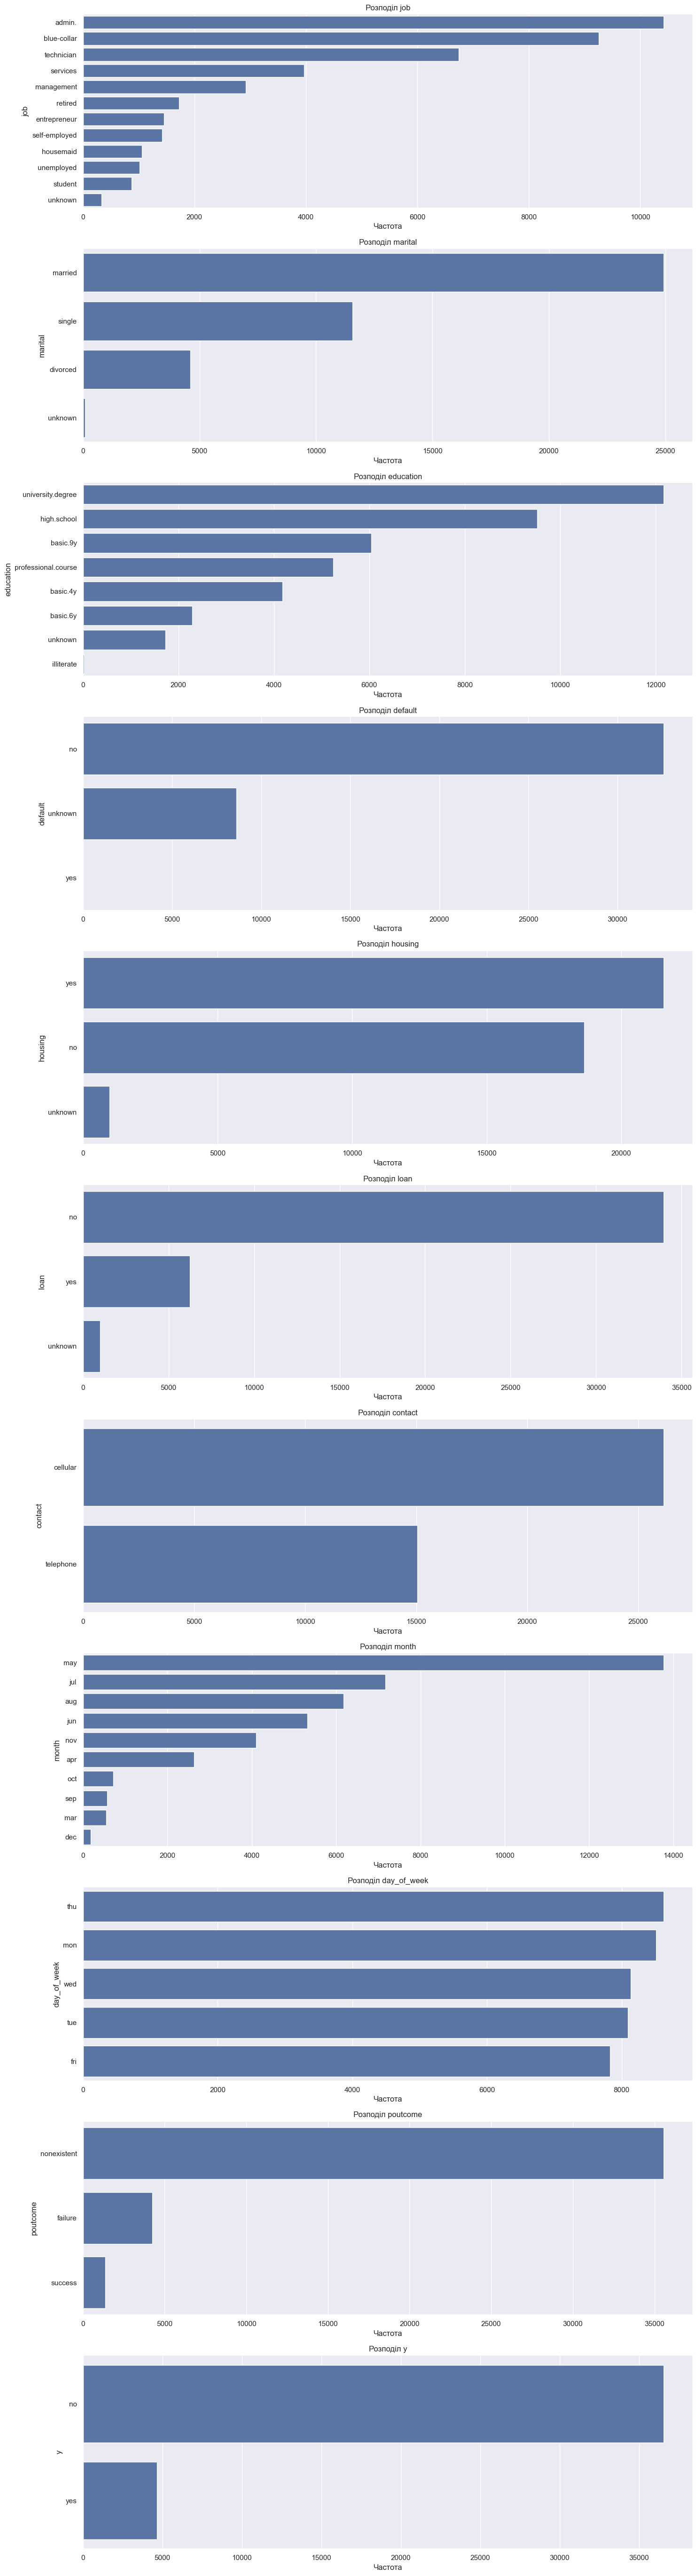

In [213]:
plt.figure(figsize=(15, len(categorical_columns) * 5))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 1, i)
    sns.countplot(y=df[column], order=df[column].value_counts().index)
    plt.title(f'Розподіл {column}')
    plt.xlabel('Частота')
    plt.ylabel(column)
    desc = df[column].describe()

plt.tight_layout()
plt.show()

## Data cleaning & Analyzing relationships

* Який середній вік неодружених клієнтів?

In [214]:
single_clients = df[df['marital'] == 'single']
average_age = single_clients['age'].mean()
print(f"Середній вік неодружених клієнтів: {average_age}")

Середній вік неодружених клієнтів: 33.15871369294606


* В який день тижня (ознака **day_of_week**) найчастіше дзвонили клієнтам, які відмовилися від депозиту?

In [215]:
rejected_clients = df[df['y'] == 'no']
most_common_day = rejected_clients['day_of_week'].mode()[0]

print(f"Найчастіший день тижня для дзвінків клієнтам, які відмовилися від депозиту: {most_common_day}")

Найчастіший день тижня для дзвінків клієнтам, які відмовилися від депозиту: mon


* Побудуйте інфографіку за ознаками **marital** та **y**. Які висновки можна зробити?

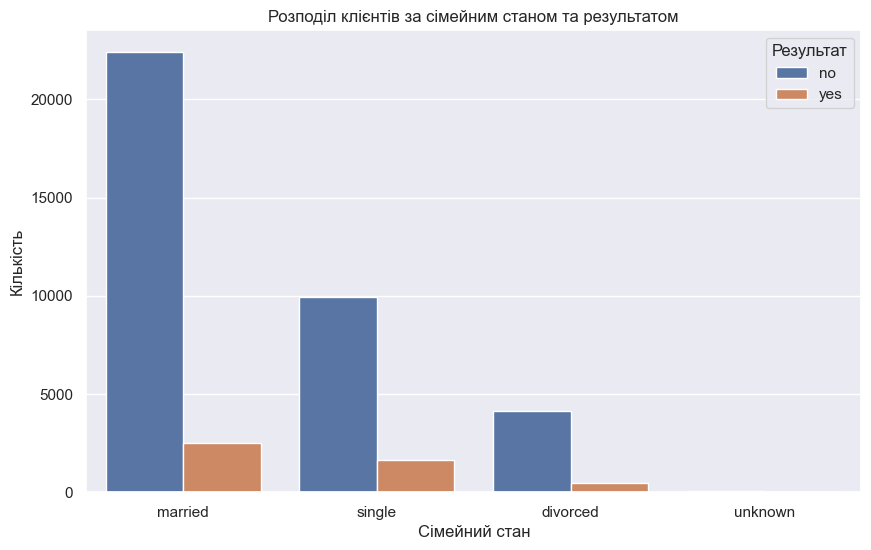

In [216]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='marital', hue='y')
plt.title('Розподіл клієнтів за сімейним станом та результатом')
plt.xlabel('Сімейний стан')
plt.ylabel('Кількість')
plt.legend(title='Результат', loc='upper right')
plt.show()

Висновок: 

У всіх категоріях сімейного стану кількість клієнтів, які відмовилися від депозиту, перевищує кількість тих, хто підписався. Найбільша різниця між кількістю “no” та “yes” спостерігається серед одружених клієнтів. 

Одружені клієнти мають найвищу кількість як позитивних, так і негативних відповідей, що може свідчити про те, що ця група є найбільшою серед усіх клієнтів банку. Неодружені клієнти також мають значну кількість відповідей, але меншу порівняно з одруженими. Розлучені клієнти та клієнти з невідомим сімейним станом мають найменшу кількість відповідей.

Отже, одружені клієнти є важливою цільовою групою для маркетингових кампаній банку, і можливо, варто дослідити причини їх відмови від депозиту для покращення стратегії залучення.

* Чи є зв'язок між наявністю кредиту (**default**) у клієнта та результатом? Побудуйте інфографіку.

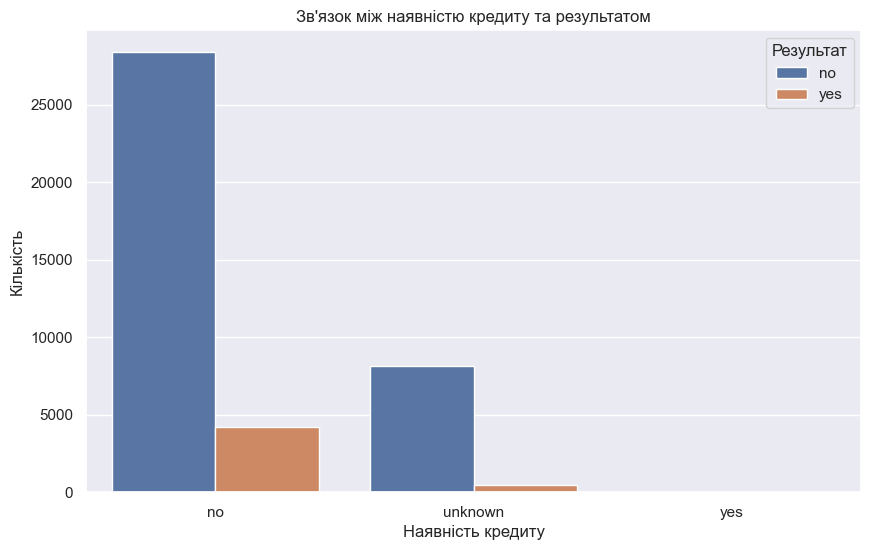

In [217]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='default', hue='y')
plt.title('Зв\'язок між наявністю кредиту та результатом')
plt.xlabel('Наявність кредиту')
plt.ylabel('Кількість')
plt.legend(title='Результат', loc='upper right')
plt.show()


Висновок:

Найбільша кількість клієнтів припадає на категорію “no” (немає кредиту). Це стосується як тих, хто підписався на депозит, так і тих, хто відмовився. Кількість клієнтів з невідомим статусом кредиту (“unknown”) та з наявним кредитом (“yes”) значно менша.

Серед клієнтів без кредиту (“no”) значно більше тих, хто відмовився від депозиту, ніж тих, хто підписався. Клієнти з невідомим статусом кредиту (“unknown”) та з наявним кредитом (“yes”) також частіше відмовляються від депозиту, але їх кількість значно менша.

Клієнти без кредиту складають найбільшу частку серед усіх клієнтів банку, і вони частіше відмовляються від депозиту, ніж підписуються на нього. Це може вказувати на те, що наявність кредиту не є основним фактором, що впливає на рішення підписатися на депозит, але клієнти без кредиту все ж частіше відмовляються.

* Візуалізуйте інформацію про рівень освіти залежно від середнього віку. Чи є статистично значущим взаємозв'язок між ними?

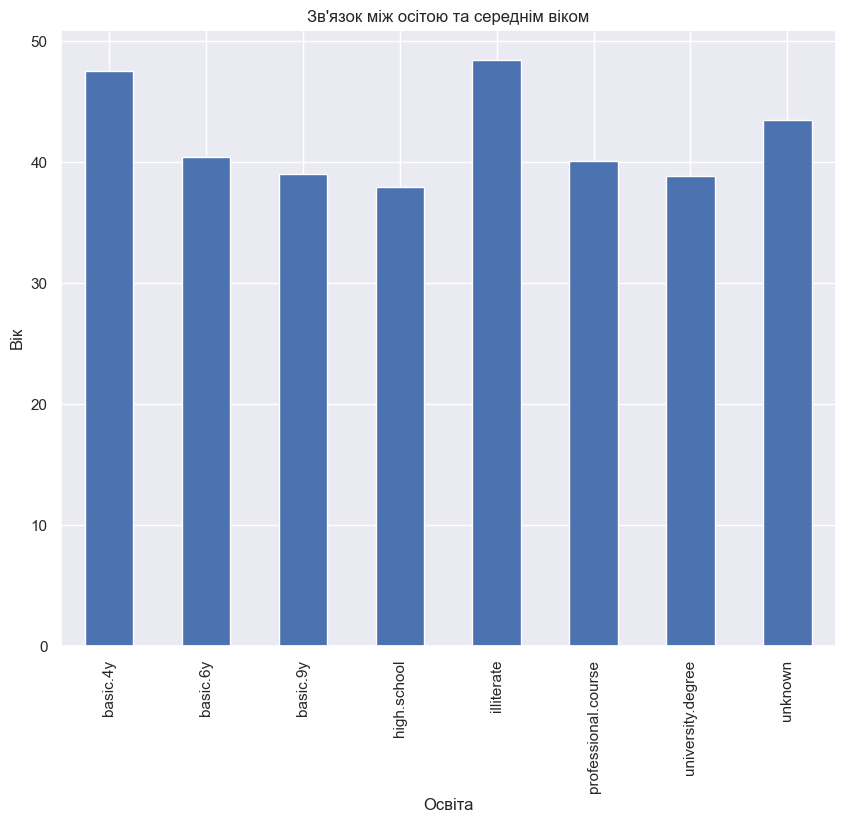

In [218]:
df.groupby('education')['age'].mean().plot(kind='bar')
plt.title('Зв\'язок між осітою та середнім віком')
plt.xlabel('Освіта') 
plt.ylabel('Вік')
plt.show()

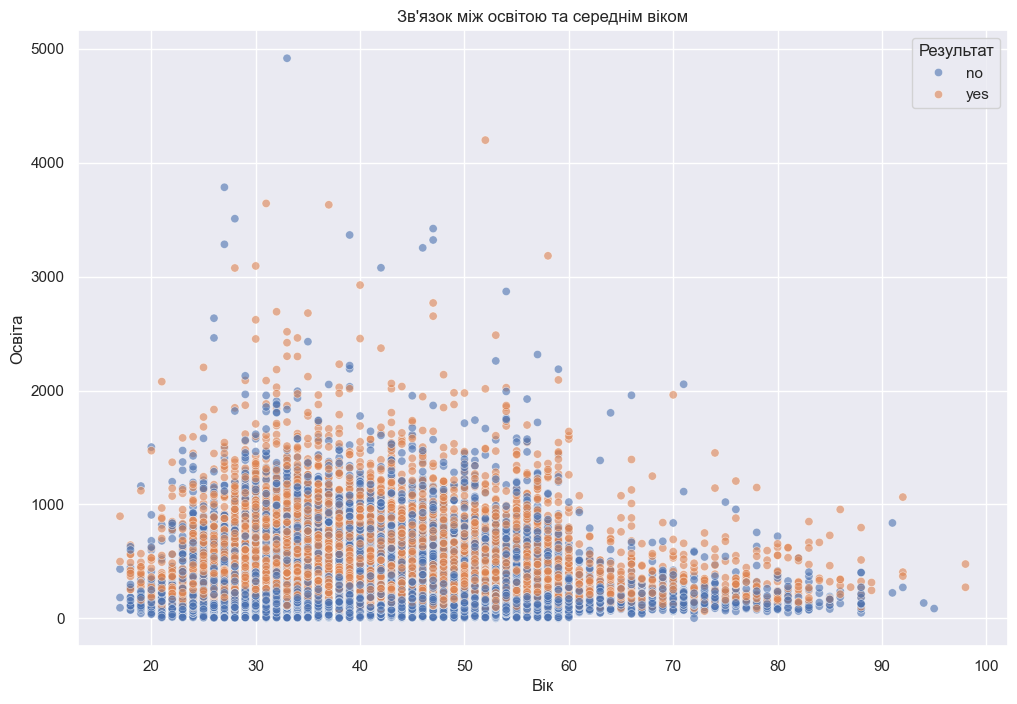

Коєфіцієнт кореляції Пірсона: -0.0009
p-value: 0.8605


In [219]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='duration', data=df, hue='y', alpha=0.6)

plt.title('Зв\'язок між освітою та середнім віком')
plt.xlabel('Вік')
plt.ylabel('Освіта')
plt.legend(title='Результат', loc='upper right')
plt.grid(True)
plt.show()

correlation, p_value = pearsonr(df['age'], df['duration'])

print(f"Коєфіцієнт кореляції Пірсона: {correlation:.4f}")
print(f'p-value: {p_value:.4f}')

Висновок:
p-value = 0.8605, що більше за 0.05, тому не є статистично значущим взаємозв'язок між освітою та серднім віком?

* Що можна сказати про зв'язок між тривалістю контакту (ознака **duration**) та віком клієнта? Знайдіть коефіцієнт кореляції.

In [220]:
correlation = df['duration'].corr(df['age'])
print(f"Коефіцієнт кореляції між тривалістю контакту та віком клієнта: {correlation}")

Коефіцієнт кореляції між тривалістю контакту та віком клієнта: -0.0008657050101409424


Висновок:

На основі отриманого коефіцієнта кореляції можна зробити висновок, що між тривалістю контакту та віком клієнта немає значущого лінійного зв’язку. Це означає, що вік клієнта не є фактором, який впливає на тривалість контакту з ним.

* Як пов'язані ознаки **education** та **housing**?

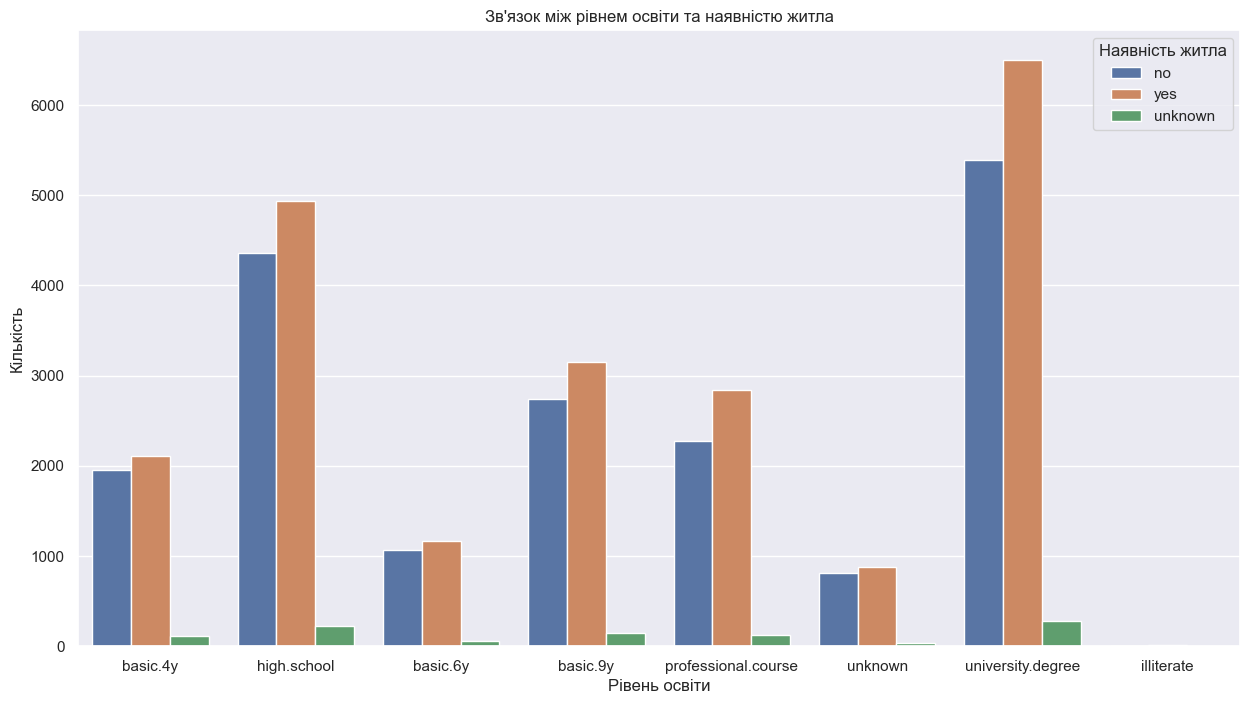

In [221]:
plt.figure(figsize=(15, 8))
sns.countplot(data=df, x='education', hue='housing')
plt.title('Зв\'язок між рівнем освіти та наявністю житла')
plt.xlabel('Рівень освіти')
plt.ylabel('Кількість')
plt.legend(title='Наявність житла', loc='upper right')
plt.show()

Висновок:

На основі цієї діаграми можна зробити висновок, що існує певний зв’язок між рівнем освіти та наявністю житла. Люди з вищим рівнем освіти частіше мають житло, тоді як люди з нижчим рівнем освіти або невідомим рівнем освіти частіше не мають житла. Це може свідчити про те, що вищий рівень освіти сприяє кращим житловим умовам.

* Які ще інсайти можна знайти в наявних даних? Творче завдання.

1. Візуалізація інформації між професією та результатом.

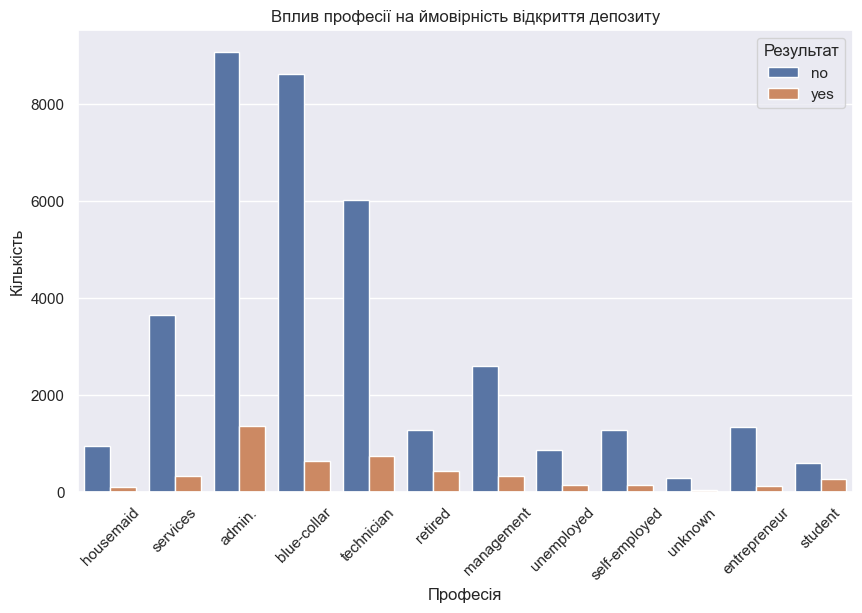

In [222]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='job', hue='y')
plt.title('Вплив професії на ймовірність відкриття депозиту')
plt.xlabel('Професія')
plt.ylabel('Кількість')
plt.legend(title='Результат', loc='upper right')
plt.xticks(rotation=45)
plt.show()

Висновок:

Професія значно впливає на ймовірність відкриття депозиту. Люди, зайняті в управлінні, технічних спеціальностях, підприємництві та студенти, частіше відкривають депозити. Водночас безробітні, домогосподарки та робітники менш схильні до цього.

2. Аналіз середньої тривалості контакту залежно від сімейного стану та результату.

In [223]:
df.pivot_table(values='duration', index='marital', columns='y', aggfunc='mean')

y,no,yes
marital,,
divorced,219.339217,553.138655
married,221.204233,577.938389
single,220.417270,513.952469
unknown,256.588235,630.833333


Ця зведена таблиця дозволяє побачити, як середня тривалість контакту змінюється залежно від сімейного стану клієнта та результату (підписався на депозит чи ні). Наприклад, можна побачити, що одружені клієнти, які підписалися на депозит, мають середню тривалість контакту 577.9 секунд, тоді як ті, хто не підписався, мають середню тривалість 221.2 секунд.

Висновок:

Сімейний стан впливає на середню тривалість дзвінків, причому довші дзвінки частіше закінчуються позитивним результатом. Люди з невідомим сімейним станом мають найвищу середню тривалість дзвінків, що може вимагати додаткового аналізу для розуміння причин цього явища.

3. Аналіз впливу кількості попередніх контактів на результат

In [224]:
df.groupby('y')['previous'].mean()

y
no     0.132374
yes    0.492672
Name: previous, dtype: float64

Висновок:

Більша кількість попередніх контактів позитивно впливає на ймовірність відкриття депозиту. Це може свідчити про те, що клієнти, з якими було більше взаємодій, краще обізнані про пропозиції банку і, відповідно, більш схильні до відкриття депозиту.

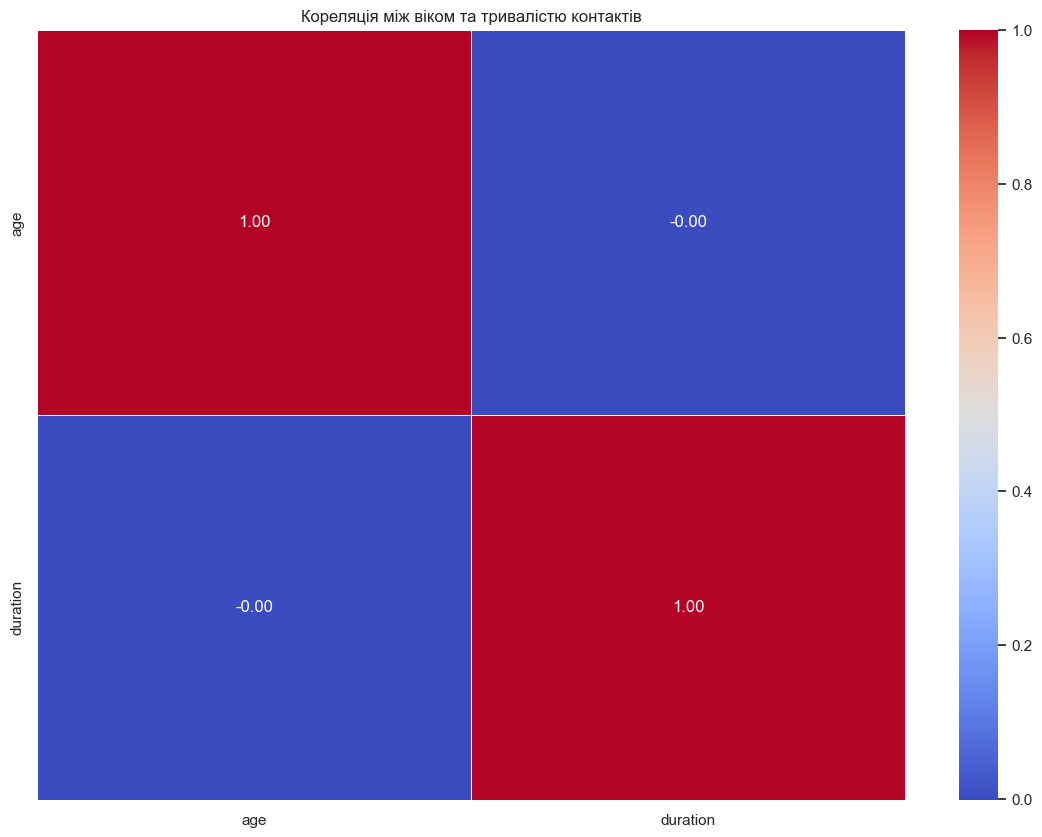

In [225]:
matrix = df[['age', 'duration']].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='white')
plt.title('Кореляція між віком та тривалістю контактів')
plt.show()

Висновок:

На основі кореляційної матриці, кореляція між віком та тривалістю контактів становить приблизно 0.00. Це означає, що між цими двома змінними немає лінійної залежності. Іншими словами, вік клієнта не впливає на тривалість контактів.